Text(0.5, 1.0, 'Likelihood for $x =x_0 =10$')

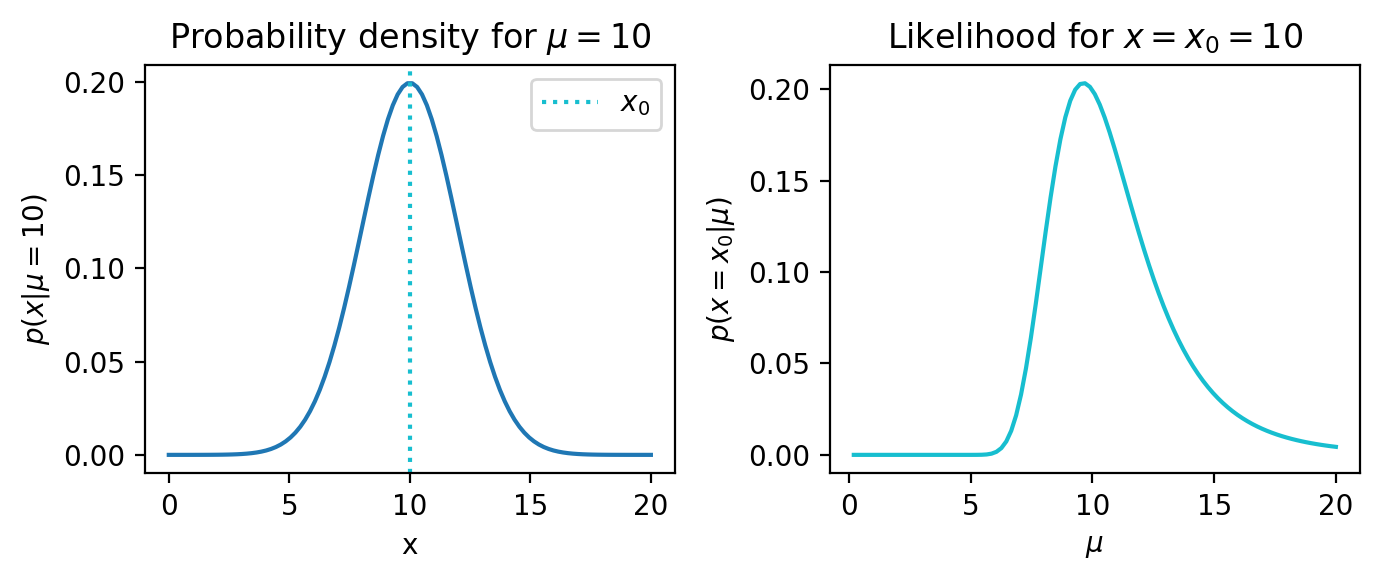

In [54]:
import jax
import jax.numpy as jnp
import jax.scipy as jsc
from jaxopt import OptaxSolver
from optax import adam
import matplotlib.pyplot as plt

subplot_settings = dict(figsize=[7, 3], dpi=200, tight_layout=True)


def pdf(x, mu):
    return jsc.stats.norm.pdf(x, mu, 0.2 * mu)


mu = 10
x0 = 10

grid = jnp.linspace(0, 20, 100)

fig, axs = plt.subplots(1, 2, **subplot_settings)

ax = axs[0]
ax.plot(grid, pdf(grid, mu))
ax.axvline(x0, label="$x_0$", linestyle="dotted", color="C9")
ax.set_xlabel("x")
ax.set_ylabel("$p(x|\mu=10)$")
ax.legend()
ax.set_title("Probability density for $\mu =10$")
ax = axs[1]
ax.plot(grid, jax.vmap(pdf, in_axes=(None, 0))(x0, grid), color="C9")
ax.set_xlabel("$\mu$")
ax.set_ylabel("$p(x=x_0|\mu)$")
ax.set_title("Likelihood for $x =x_0 =10$")

In [25]:
def central_interval(data, conf_level, inits):
    level = 1 - (1 - conf_level) / 2

    def solve(init, level):
        def loss(mu):
            return (level - jsc.stats.norm.cdf(data, mu, mu * 0.2)) ** 2

        solver = OptaxSolver(loss, adam(1e-3), tol=1e-8, maxiter=1e5)
        return solver.run(init).params

    lower = solve(inits[0], level)
    upper = solve(inits[1], 1 - level)

    return lower, upper


mu1, mu2 = central_interval(x0, 0.683, [5.0, 5.0])

Text(0.5, 1.0, '$\\mu=\\mu_{\\mathrm{upper}} = $12.5')

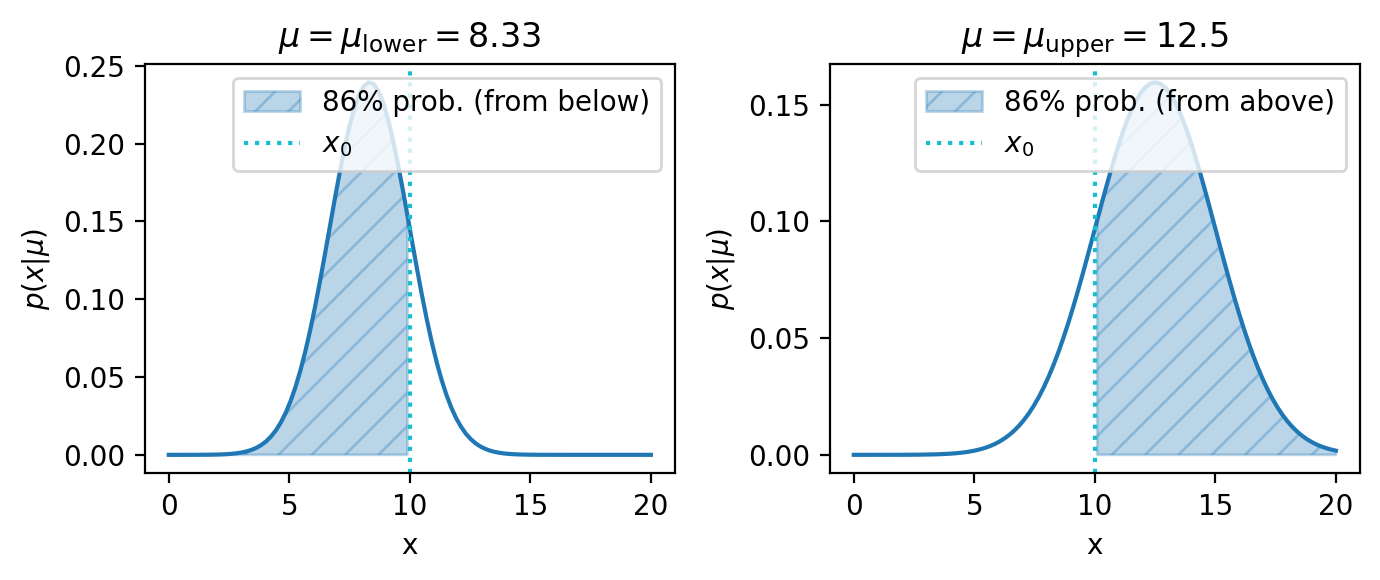

In [49]:
fig, axs = plt.subplots(1, 2, **subplot_settings)

ax = axs[0]
ax.plot(grid, pdf(grid, mu1))
ax.fill_between(
    grid[grid < x0],
    0,
    pdf(grid[grid < x0], mu1),
    hatch="//",
    edgecolor="C0",
    alpha=0.3,
    label="86% prob. (from below)",
)
ax.axvline(x0, label="$x_0$", linestyle="dotted", color="C9")
ax.set_xlabel("x")
ax.set_ylabel("$p(x|\mu)$")
ax.legend(loc="upper right")
ax.set_title(r"$\mu=\mu_{\mathrm{lower}} = $" + f"{mu1:.3g}")
ax = axs[1]
ax.plot(grid, pdf(grid, mu2))
ax.fill_between(
    grid[grid > x0],
    0,
    pdf(grid[grid > x0], mu2),
    hatch="//",
    edgecolor="C0",
    alpha=0.3,
    label="86% prob. (from above)",
)
ax.axvline(x0, label="$x_0$", linestyle="dotted", color="C9")
ax.set_xlabel("x")
ax.set_ylabel("$p(x|\mu)$")
ax.legend(loc="upper right")
ax.set_title(r"$\mu=\mu_{\mathrm{upper}} = $" + f"{mu2:.3g}")